<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  

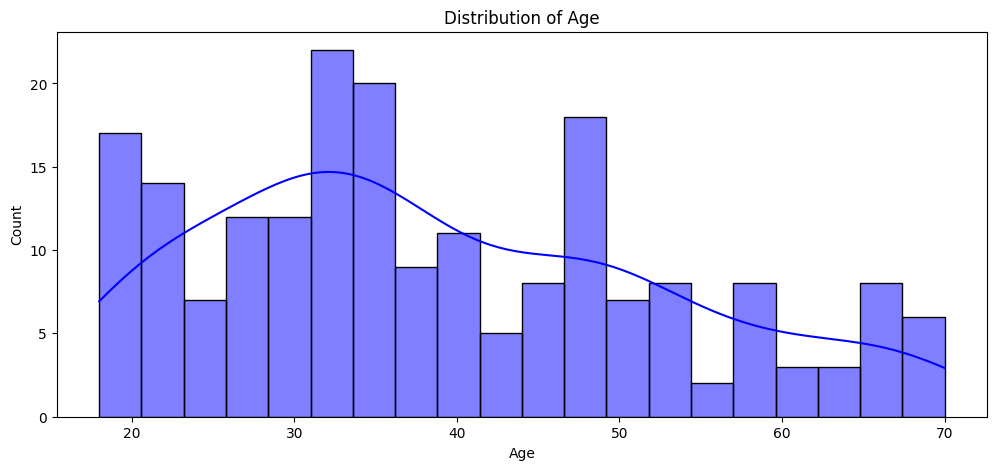

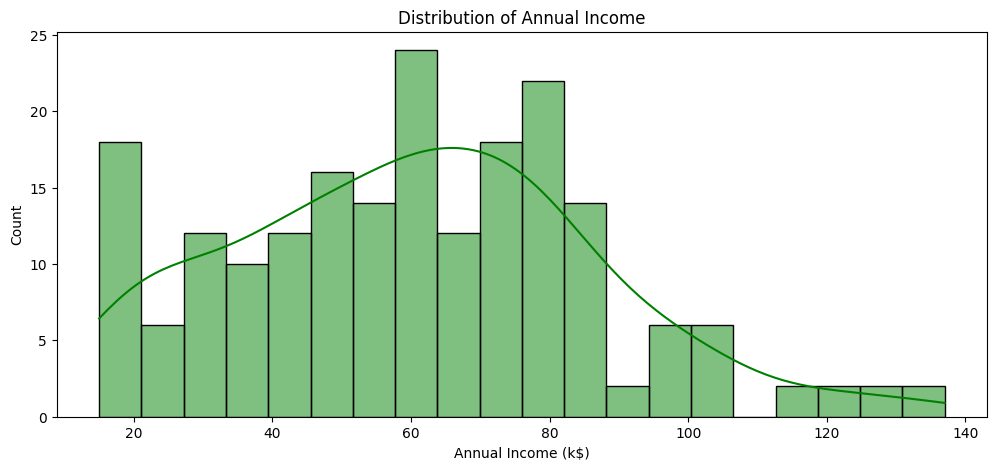

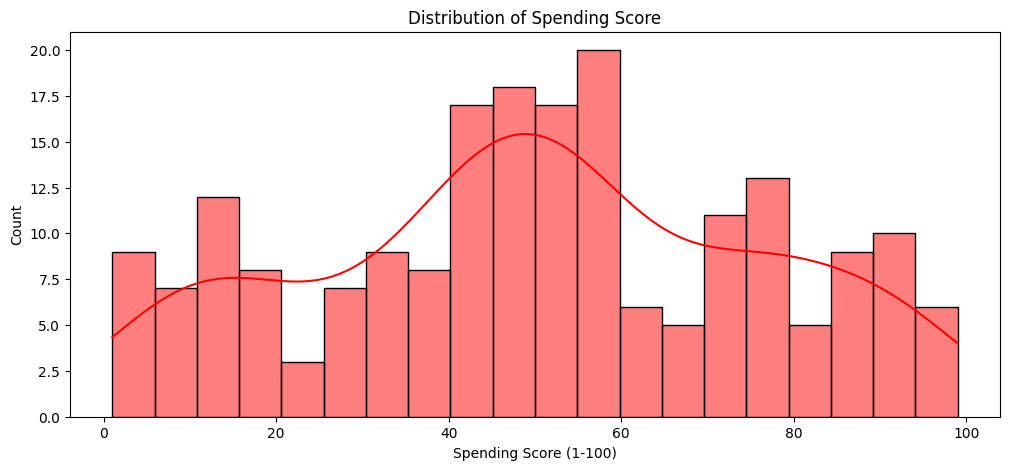

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

# Step 3: Display basic info
print(df.info())  # Check for missing values and data types
print(df.head())  # Show first few rows
print(df.describe())  # Summary statistics

# Step 4: Check for missing values
print("Missing values:\n", df.isnull().sum())

# Step 5: Visualize feature distributions
plt.figure(figsize=(12, 5))
sns.histplot(df['Age'], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color="green")
plt.title("Distribution of Annual Income")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color="red")
plt.title("Distribution of Spending Score")
plt.show()


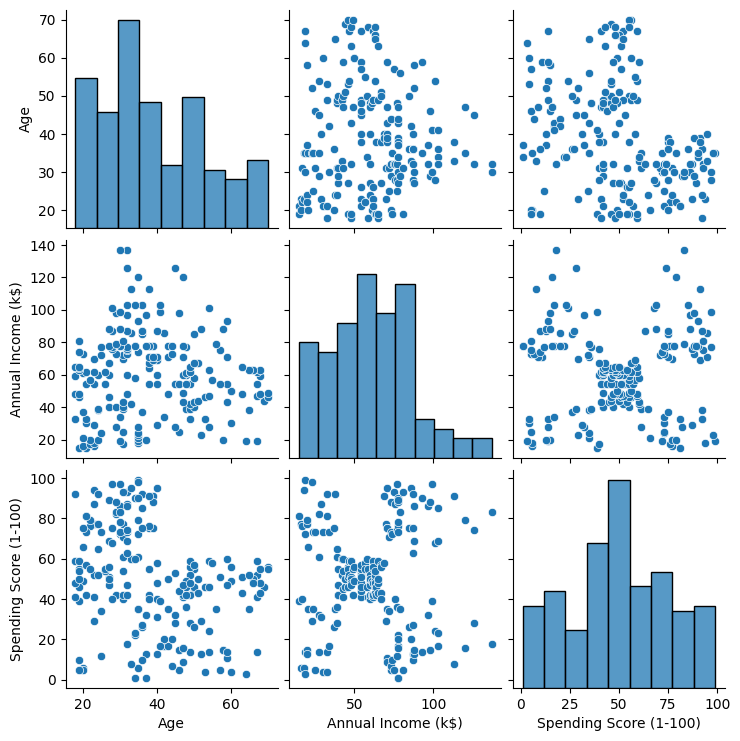

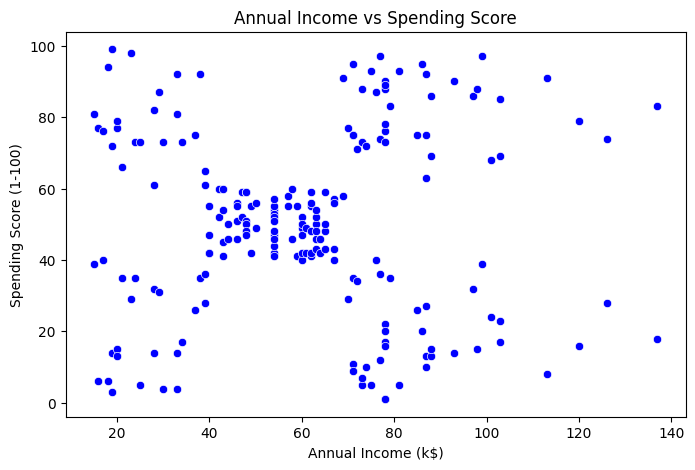

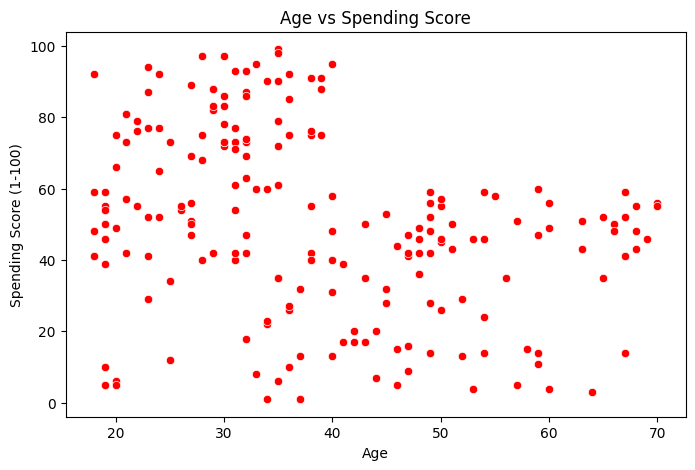

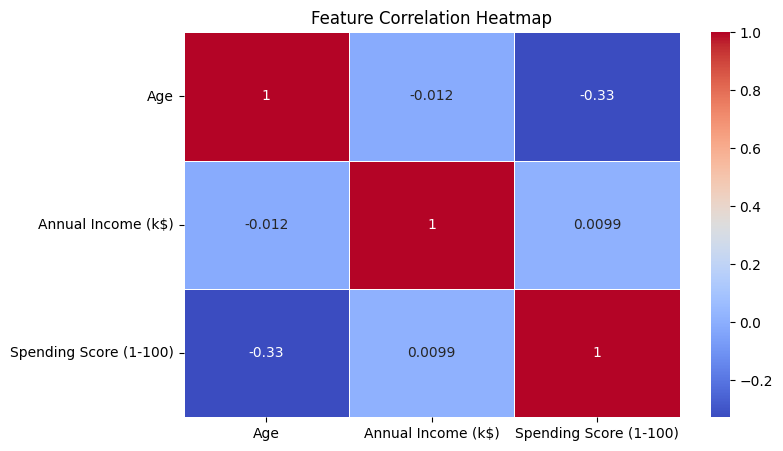

In [2]:
# Step 6: Pair plot to explore relationships
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# Step 7: Scatter plots to analyze key relationships
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], color="blue")
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], color="red")
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Step 8: Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler

# Step 9.1: Select features for clustering (ignore 'CustomerID' and 'Gender')
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 9.2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display first 5 rows of scaled data
print(pd.DataFrame(X_scaled, columns=['Age', 'Annual Income', 'Spending Score']).head())


        Age  Annual Income  Spending Score
0 -1.424569      -1.738999       -0.434801
1 -1.281035      -1.738999        1.195704
2 -1.352802      -1.700830       -1.715913
3 -1.137502      -1.700830        1.040418
4 -0.563369      -1.662660       -0.395980


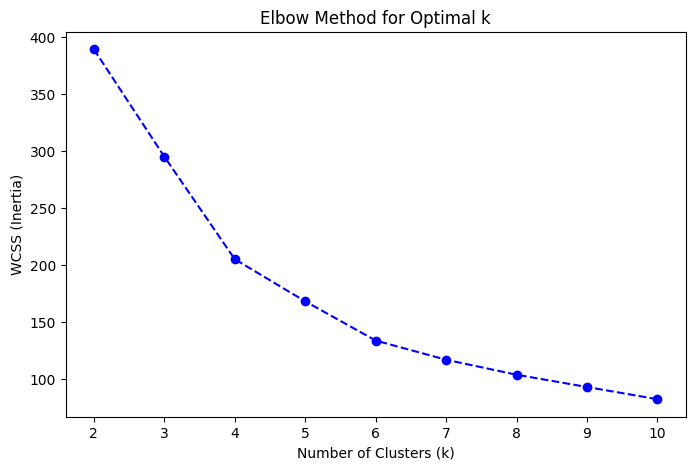

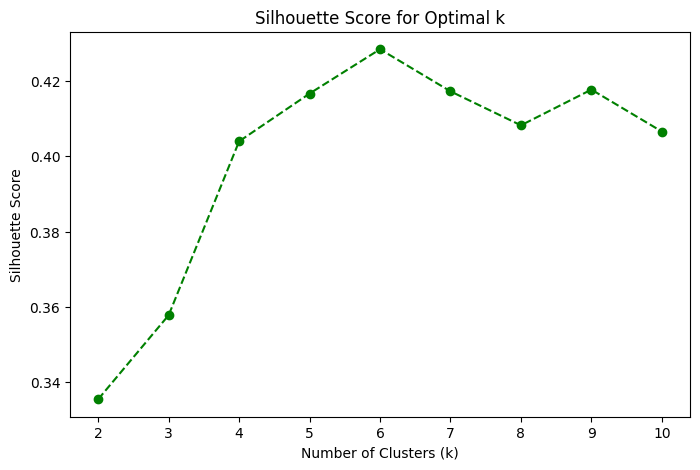

Optimal number of clusters: 6


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 10.1: Determine optimal k using the Elbow Method
wcss = []
silhouette_scores = []
K_range = range(2, 11)  # Testing for k from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))  # Silhouette score

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

# Step 10.2: Choose the best k (elbow point & highest silhouette score)
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")


Cluster
0    45
1    39
3    39
2    33
4    23
5    21
Name: count, dtype: int64


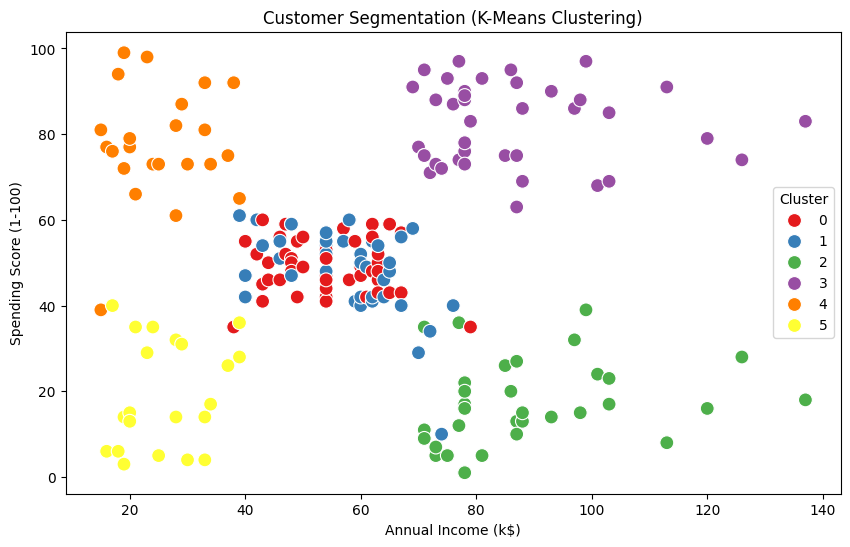

In [5]:
# Step 11.1: Apply K-Means with optimal k
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 11.2: Check cluster distribution
print(df['Cluster'].value_counts())

# Step 11.3: Visualize clusters in 2D (Annual Income vs Spending Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette="Set1", s=100)
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()


In [6]:
# Step 12.1: Compute mean values for each cluster
cluster_summary = df.groupby("Cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

# Step 12.2: Count customers per cluster
cluster_counts = df["Cluster"].value_counts()
print("Customer count per cluster:\n", cluster_counts)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        26.794872           57.102564               48.128205
2        41.939394           88.939394               16.969697
3        32.692308           86.538462               82.128205
4        25.000000           25.260870               77.608696
5        45.523810           26.285714               19.380952
Customer count per cluster:
 Cluster
0    45
1    39
3    39
2    33
4    23
5    21
Name: count, dtype: int64


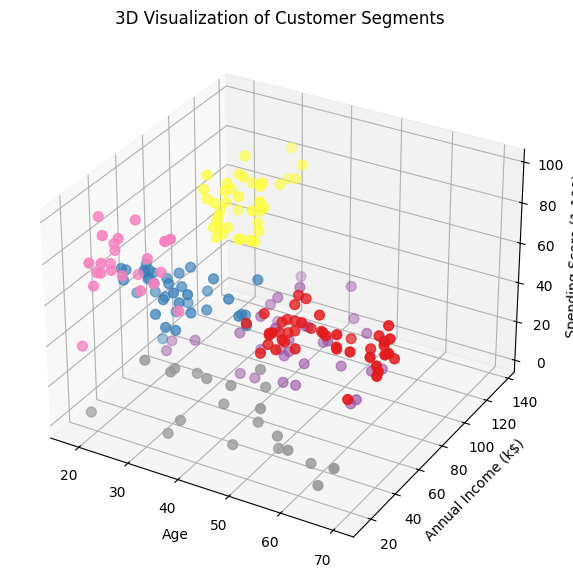

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Step 13.1: 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='Set1', s=50)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D Visualization of Customer Segments")

plt.show()


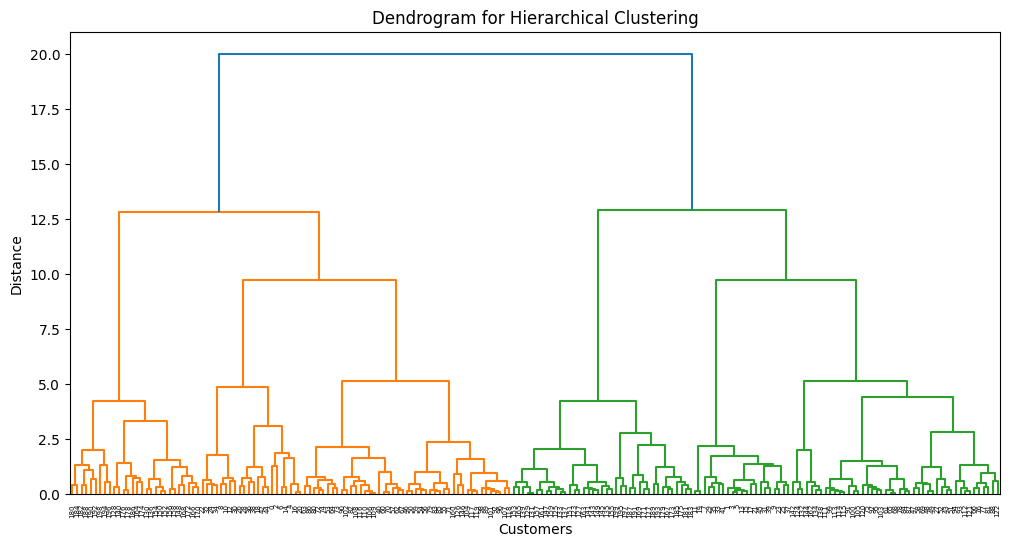

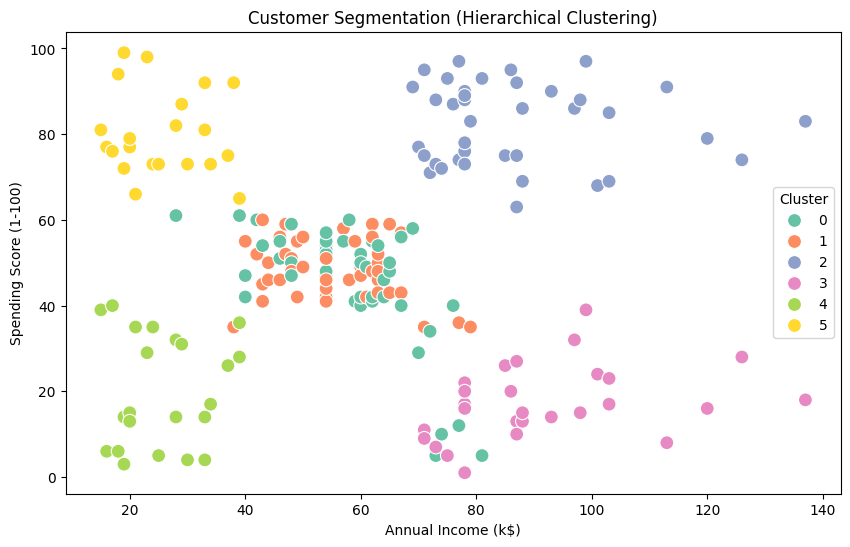

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Step 14.1: Create a Dendrogram to determine optimal clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# Step 14.2: Apply Hierarchical Clustering with 6 clusters (same as K-Means)
# Removing the 'affinity' argument as it's not needed when linkage='ward'
hierarchical = AgglomerativeClustering(n_clusters=6, linkage='ward')
df['Hierarchical Cluster'] = hierarchical.fit_predict(X_scaled)

# Step 14.3: Visualize Hierarchical Clusters (2D plot: Income vs Spending Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Hierarchical Cluster'], palette="Set2", s=100)
plt.title("Customer Segmentation (Hierarchical Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

In [10]:
# Compute mean values for each cluster
cluster_summary = df.groupby("Cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        26.794872           57.102564               48.128205
2        41.939394           88.939394               16.969697
3        32.692308           86.538462               82.128205
4        25.000000           25.260870               77.608696
5        45.523810           26.285714               19.380952


In [11]:
# Define cluster labels
cluster_labels = {
    0: "Premium Shoppers",
    1: "Wealthy Cautious Buyers",
    2: "Budget-Conscious Shoppers",
    3: "Average Consumers",
    4: "Low-Income Minimal Spenders",
    5: "Wealthy Retired Spenders"
}

# Apply labels to the DataFrame
df["Segment"] = df["Cluster"].map(cluster_labels)

# Display first few rows with assigned segments
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Segment']].head())


   Age  Annual Income (k$)  Spending Score (1-100)  \
0   19                  15                      39   
1   21                  15                      81   
2   20                  16                       6   
3   23                  16                      77   
4   31                  17                      40   

                       Segment  
0  Low-Income Minimal Spenders  
1  Low-Income Minimal Spenders  
2     Wealthy Retired Spenders  
3  Low-Income Minimal Spenders  
4     Wealthy Retired Spenders  


In [12]:
# Save the segmented dataset to a CSV file
df.to_csv("Customer_Segments.csv", index=False)
print("Segmented dataset saved as 'Customer_Segments.csv'")


Segmented dataset saved as 'Customer_Segments.csv'
